## Case Study5 DS7333 
### Business Understanding
This case study is for a big company that has lot of firewall interactions looking to solve a problem in cyber security area. The goal of this study is to build a model that classifies whether to accept or deny request coming in and it needs to be accurate and function at speed. We are provided with some historical data where they have chosen manually to accept or deny there requests. 

In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#from pandas_profiling import ProfileReport

### Data Evaluation

In [51]:
raw_data= pd.read_csv("./data/log2.csv")

In [52]:
raw_data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [53]:
raw_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [54]:
raw_data['Action'].value_counts(normalize=False)

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [55]:
target_mod = {
    'allow':'allow',
    'deny':'deny',
    'drop':'deny',
    'reset-both':'deny'
}
raw_data['Action_mod'] = raw_data['Action'].map(target_mod)
del raw_data['Action']
raw_data['Action_mod'] = raw_data['Action_mod'].astype('category')

In [56]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Source Port           65532 non-null  int64   
 1   Destination Port      65532 non-null  int64   
 2   NAT Source Port       65532 non-null  int64   
 3   NAT Destination Port  65532 non-null  int64   
 4   Bytes                 65532 non-null  int64   
 5   Bytes Sent            65532 non-null  int64   
 6   Bytes Received        65532 non-null  int64   
 7   Packets               65532 non-null  int64   
 8   Elapsed Time (sec)    65532 non-null  int64   
 9   pkts_sent             65532 non-null  int64   
 10  pkts_received         65532 non-null  int64   
 11  Action_mod            65532 non-null  category
dtypes: category(1), int64(11)
memory usage: 5.6 MB


In [57]:
raw_data['Action_mod'].value_counts(normalize=False)

allow    37640
deny     27892
Name: Action_mod, dtype: int64

In [58]:
raw_data['Action_mod'].value_counts(normalize=True)

allow    0.574376
deny     0.425624
Name: Action_mod, dtype: float64

In [59]:
raw_data.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action_mod              0
dtype: int64

In [60]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Source Port           65532 non-null  int64   
 1   Destination Port      65532 non-null  int64   
 2   NAT Source Port       65532 non-null  int64   
 3   NAT Destination Port  65532 non-null  int64   
 4   Bytes                 65532 non-null  int64   
 5   Bytes Sent            65532 non-null  int64   
 6   Bytes Received        65532 non-null  int64   
 7   Packets               65532 non-null  int64   
 8   Elapsed Time (sec)    65532 non-null  int64   
 9   pkts_sent             65532 non-null  int64   
 10  pkts_received         65532 non-null  int64   
 11  Action_mod            65532 non-null  category
dtypes: category(1), int64(11)
memory usage: 5.6 MB


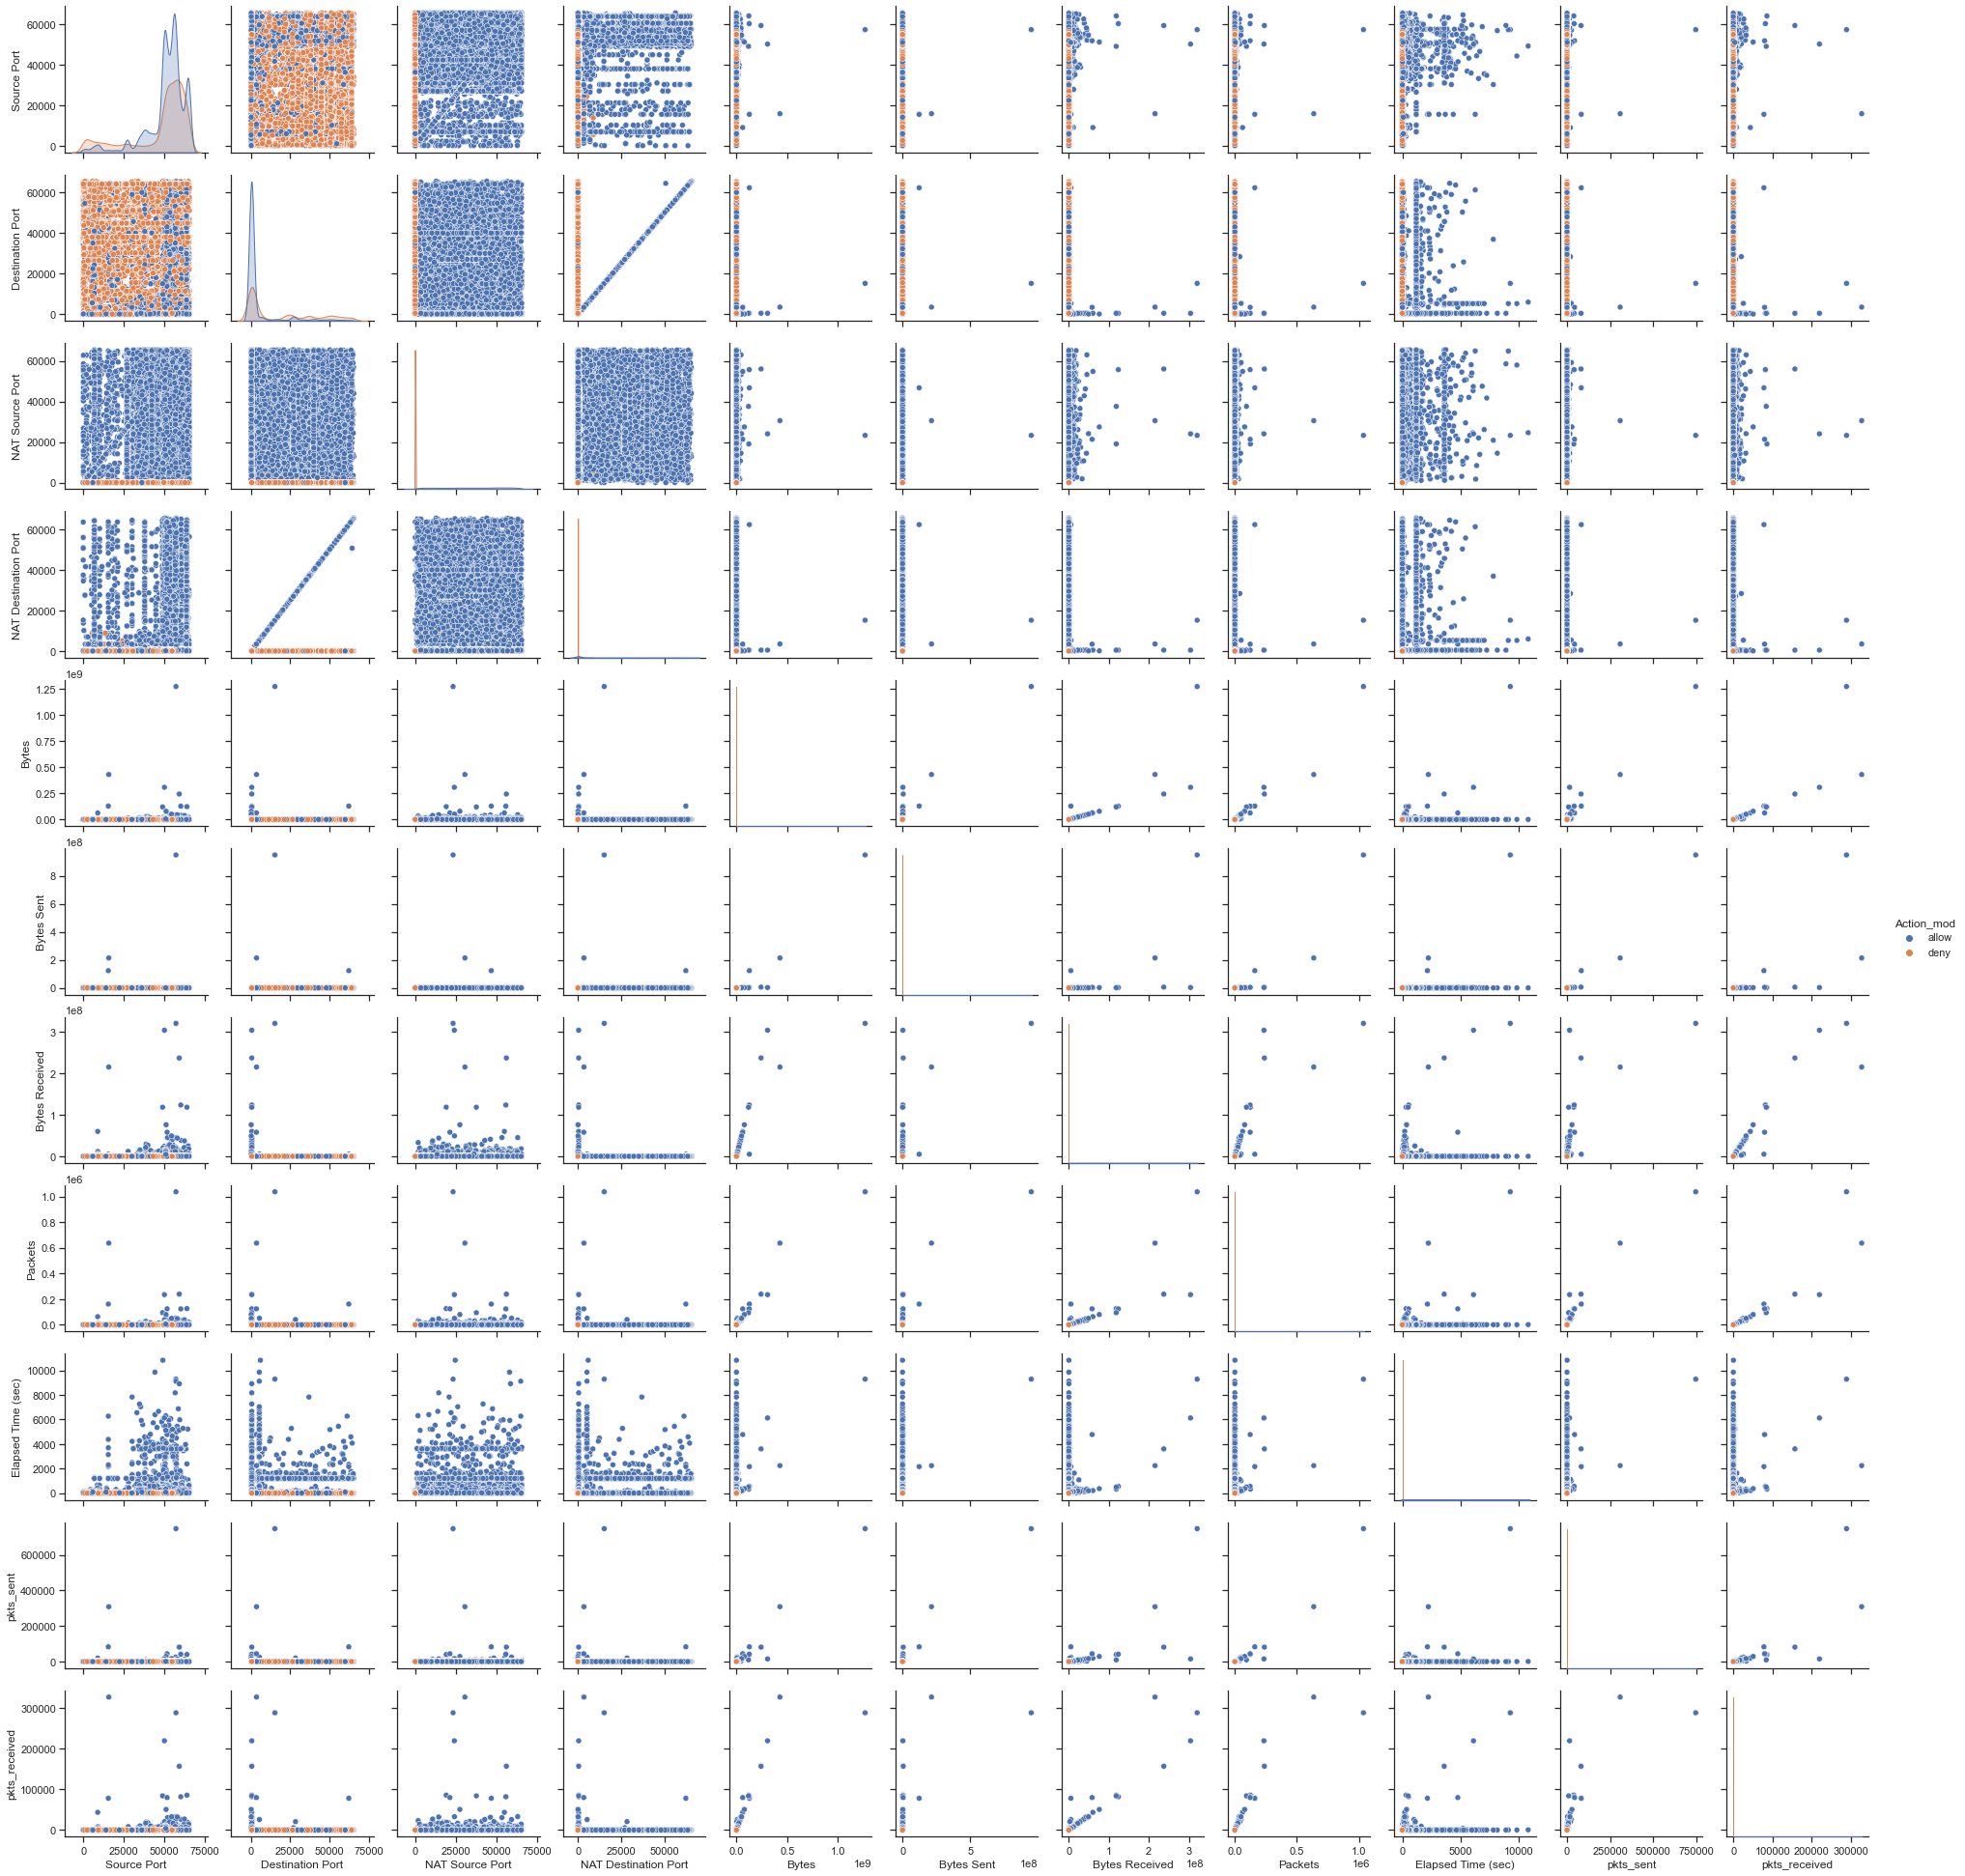

In [61]:
cols = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']
sns.pairplot(vars=cols, data=raw_data, hue="Action_mod")

<AxesSubplot:xlabel='Action_mod', ylabel='pkts_received'>

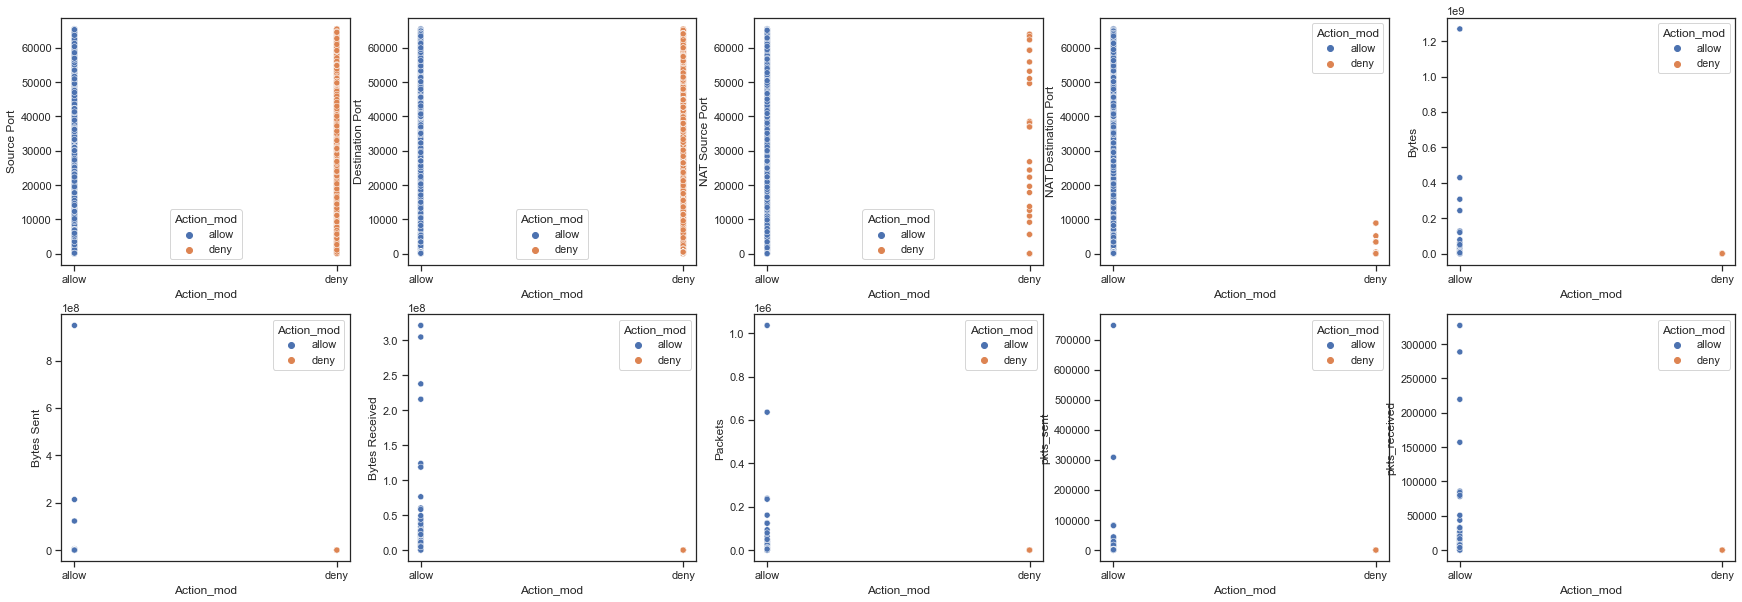

In [62]:
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
sns.scatterplot(ax=axes[0, 0],x='Action_mod',y='Source Port',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[0, 1],x='Action_mod',y='Destination Port',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[0, 2],x='Action_mod',y='NAT Source Port',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[0, 3],x='Action_mod',y='NAT Destination Port',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[0, 4],x='Action_mod',y='Bytes',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[1, 0],x='Action_mod',y='Bytes Sent',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[1, 1],x='Action_mod',y='Bytes Received',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[1, 2],x='Action_mod',y='Packets',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[1, 3],x='Action_mod',y='pkts_sent',data=raw_data, hue='Action_mod')
sns.scatterplot(ax=axes[1, 4],x='Action_mod',y='pkts_received',data=raw_data, hue='Action_mod')

### Data Evaluation Summary
* The dataset has 65532 rows, 11 features with Action being the target variable.
* There are no missing values.
* The target variable has 4 values allow(57%),deny(22%),drop(19%),reset-both(0.1%). Since the goal of the case study is to either allow or deny the traffic, drop and reset-both are considered as drop.
* The dataset is fairly balanced with 57% of rows with allow and 43% with deny.
* Pairplot shows that
    * Groups allow and deny are evenly distrubuted for the variables 'Source Port' and 'Destination Port'.
    * Linear relationship exist between 'Nat Destination Port' and 'Destination Port' for allow group.
* Scatterplot shows that
    * For the deny group the values for features like Bytes, Bytes Sent, Bytes Received, Packets, pkts_sent, pkts_received are 0's or closer to 0's.